# Predicting Early Stage Diabetes

In [1]:
#Importing Library
#Analyzing, Cleaning
import pandas as pd

In [2]:
#Reading csv file
df=pd.read_csv('C:/Users/hp/OneDrive/Desktop/diabetes_data_upload.csv')

In [3]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
import numpy as np
np.random.seed(1)
df.sample(n=10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
273,45,Male,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Negative
272,47,Male,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,Negative
329,56,Male,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
480,46,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
173,63,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,Yes,Positive
62,55,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
232,56,Male,No,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
147,38,Male,Yes,No,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,Positive
370,45,Male,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Negative
267,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive


In [5]:
#Prints the shape (rows,columns)
df.shape

(520, 17)

In [6]:
#Prints the information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
#checking for null values using isna and printing the sum of those values
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [8]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [9]:
df.corr()

,Age
Age,1.0


In [10]:
df.columns = map(str.lower, df.columns)

In [11]:
#converting categorical into numerical
df['gender'] = df['gender'].map({'Male':1,'Female':0})
df['class'] = df['class'].map({'Positive':1,'Negative':0})
df['polyuria'] = df['polyuria'].map({'Yes':1,'No':0})
df['polydipsia'] = df['polydipsia'].map({'Yes':1,'No':0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes':1,'No':0})
df['weakness'] = df['weakness'].map({'Yes':1,'No':0})
df['polyphagia'] = df['polyphagia'].map({'Yes':1,'No':0})
df['genital thrush'] = df['genital thrush'].map({'Yes':1,'No':0})
df['visual blurring'] = df['visual blurring'].map({'Yes':1,'No':0})
df['itching'] = df['itching'].map({'Yes':1,'No':0})
df['irritability'] = df['irritability'].map({'Yes':1,'No':0})
df['delayed healing'] = df['delayed healing'].map({'Yes':1,'No':0})
df['partial paresis'] = df['partial paresis'].map({'Yes':1,'No':0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes':1,'No':0})
df['alopecia'] = df['alopecia'].map({'Yes':1,'No':0})
df['obesity'] = df['obesity'].map({'Yes':1,'No':0})

In [12]:
df.corr()

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


In [13]:
#returns description of the data in the DataFrame (count, mean, std, quartiles)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0
gender,520.0,0.630769,0.483061,0.0,0.0,1.0,1.0,1.0
polyuria,520.0,0.496154,0.500467,0.0,0.0,0.0,1.0,1.0
polydipsia,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
sudden weight loss,520.0,0.417308,0.493589,0.0,0.0,0.0,1.0,1.0
weakness,520.0,0.586538,0.492928,0.0,0.0,1.0,1.0,1.0
polyphagia,520.0,0.455769,0.498519,0.0,0.0,0.0,1.0,1.0
genital thrush,520.0,0.223077,0.416710,0.0,0.0,0.0,0.0,1.0
visual blurring,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
itching,520.0,0.486538,0.500300,0.0,0.0,0.0,1.0,1.0


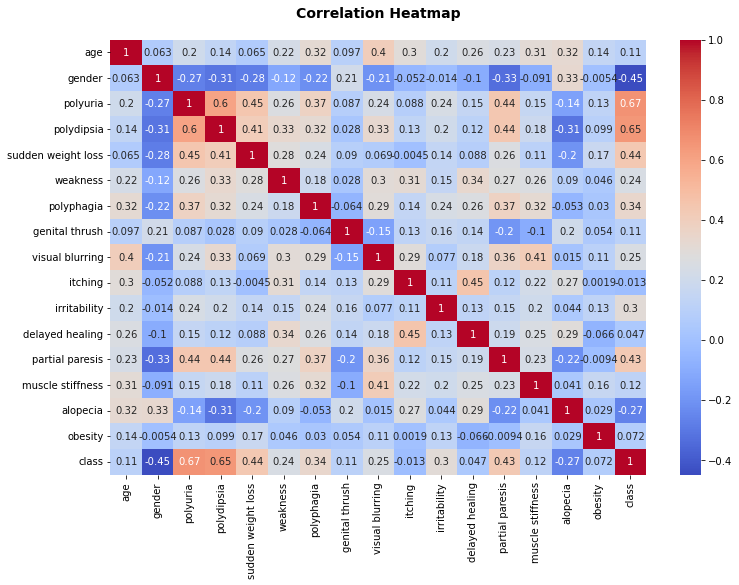

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap ='coolwarm')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

# Data Visualization

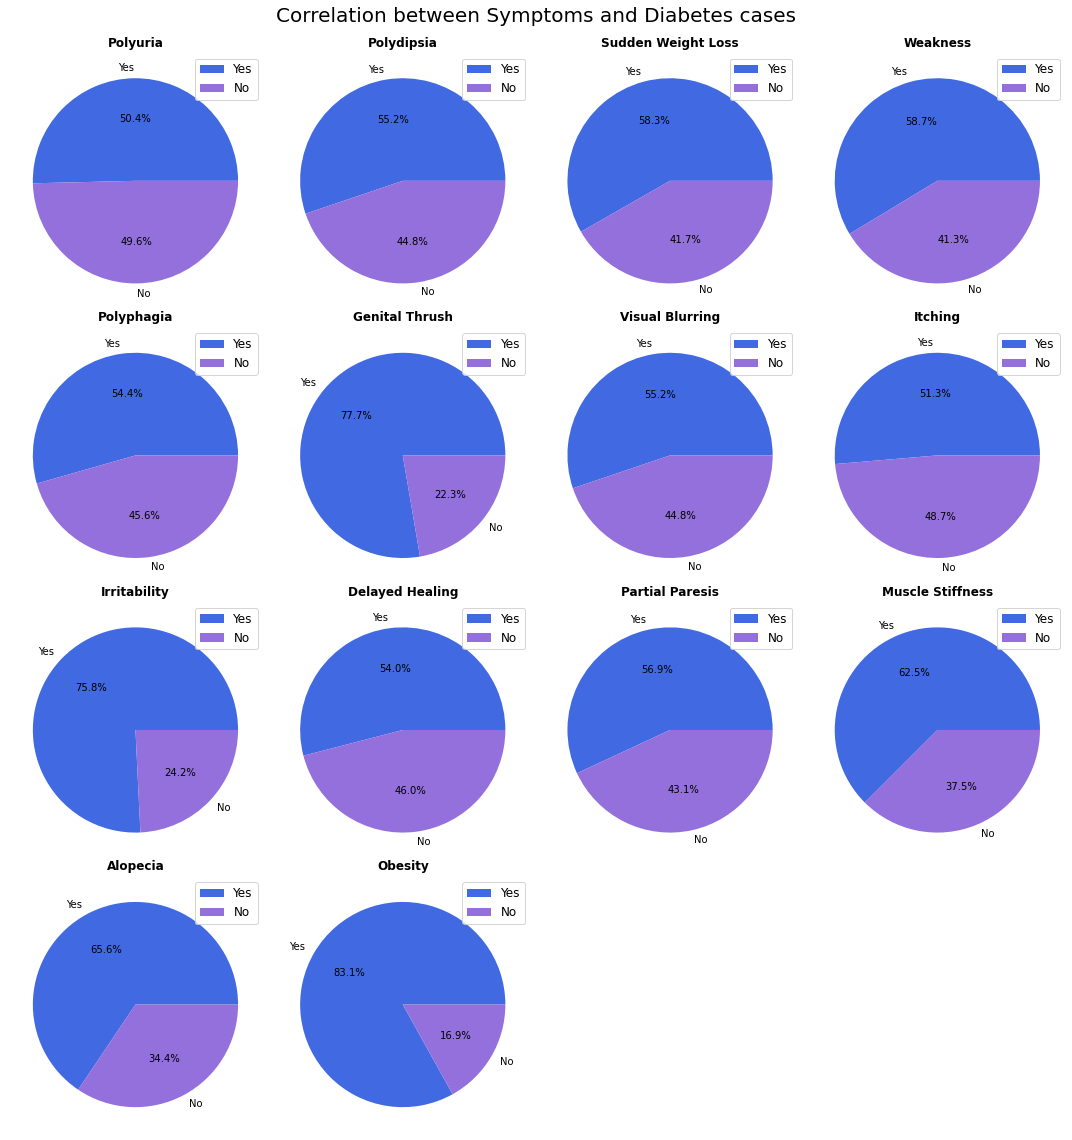

In [15]:
count = 1
plt.figure(figsize=(15,20))
plt.suptitle('Correlation between Symptoms and Diabetes cases'+ '\n', fontsize=20)
for i in df.columns:
    if i not in ['class', 'age', 'gender']:
        plt.subplot(5,4,count)
        plt.title(f'{i.title()}', fontweight='bold', fontsize=14)
        count +=1
        plt.tight_layout()
        df[i].value_counts().plot(kind="pie", colors=['royalblue','mediumpurple'],autopct='%1.1f%%',legend=True,labels=["Yes","No"])
        plt.ylabel('')
        plt.title(f'{i.title()}',fontweight='bold',fontsize=12)
        plt.legend(loc = "upper right",fontsize=12)
plt.tight_layout() 
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


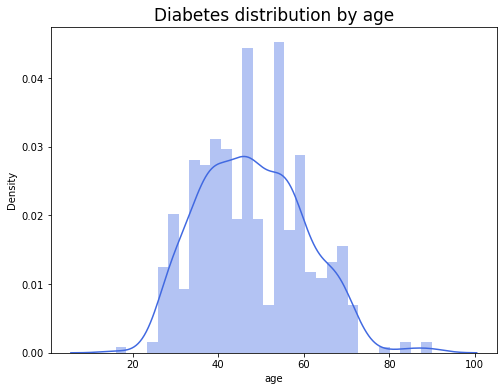

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(df['age'],bins=30, color='royalblue')  
plt.title('Diabetes distribution by age', fontsize=17);

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


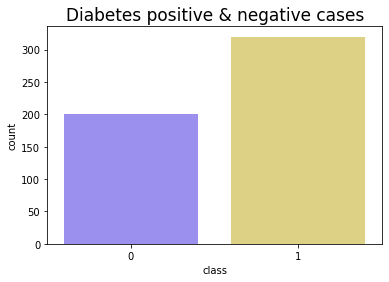

<Figure size 1080x576 with 0 Axes>

In [17]:
sns.countplot(df['class'],data=df, palette=['#9080ff',"#ebdc78"])
plt.title('Diabetes positive & negative cases', fontsize=17);
plt.figure(figsize=(15,8))
plt.show()

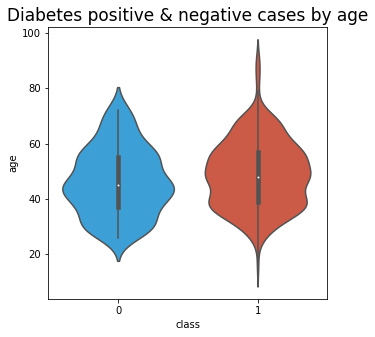

In [18]:
plt.figure(figsize=(5,5))
plt.title('Diabetes positive & negative cases by age', fontsize=17);

ax = sns.violinplot(x="class", y="age", data=df, palette=['#22a7f0',"#e14b31"])
# ax.set_xticklabels({'class':['Negative','Positive']})
# ax.set_xticklabels([*'Positive'])

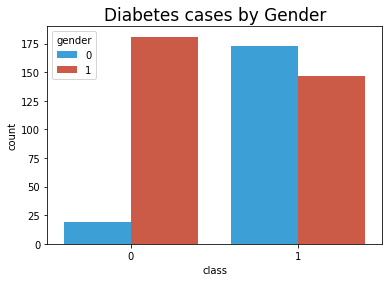

In [19]:
plt.title('Diabetes cases by Gender', fontsize=17);
ax = sns.countplot(x="class", data=df, hue="gender", palette=['#22a7f0',"#e14b31"])

# Model Fitting

In [20]:
Y = df['class']
X = df.drop('class', axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=1)

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [23]:
X = ss.fit_transform(X)

In [24]:
X_train.shape

(364, 16)

In [25]:
X_test.shape

(156, 16)

# Logistic Regression

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [27]:
lin_model=LogisticRegression()
# lin_model = LogisticRegression(penalty='l2',C=1,max_iter=4)
lin_model.fit(X_train,y_train)
lin_pred = lin_model.predict(X_test)
linscore = lin_model.score(X_test,y_test)

In [28]:
lin_error = mean_squared_error(y_test, lin_pred)
print("The Mean Squared Error For Linear Regression is: {}".format(lin_error))

The Mean Squared Error For Linear Regression is: 0.07692307692307693


In [29]:
linscore = lin_model.score(X_test,y_test)
lin_cm = confusion_matrix(y_test,lin_pred)
lin_cr = classification_report(y_test,lin_pred)
print('Logistic Regression results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(linscore *100))
print('\n')
print('Confusion Matrix')
print(lin_cm)
print('\n')
print('Classification report')
print(lin_cr)                    

Logistic Regression results
---------------------------
Accuracy is 92.31%


Confusion Matrix
[[52  6]
 [ 6 92]]


Classification report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.94      0.94      0.94        98

    accuracy                           0.92       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.92      0.92      0.92       156



# Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtr_model = DecisionTreeClassifier(random_state=0)
dtr_model.fit(X_train,y_train)
dtr_pred = dtr_model.predict(X_test)

In [32]:
dtr_error = mean_squared_error(y_test, dtr_pred)
print("The Mean Squared Error For Decision Tree Regression is: {}".format(dtr_error))

The Mean Squared Error For Decision Tree Regression is: 0.019230769230769232


In [33]:
dtscore = dtr_model.score(X_test,y_test)
dt_cm = confusion_matrix(y_test,dtr_pred)
dt_cr = classification_report(y_test,dtr_pred)
print('Decision Tree results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(dtscore *100))
print('\n')
print('Confusion Matrix')
print(dt_cm)
print('\n')
print('Classification report')
print(dt_cr)  

Decision Tree results
---------------------------
Accuracy is 98.08%


Confusion Matrix
[[55  3]
 [ 0 98]]


Classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.97      1.00      0.98        98

    accuracy                           0.98       156
   macro avg       0.99      0.97      0.98       156
weighted avg       0.98      0.98      0.98       156



In [34]:
#Importing tree from sklearn for classification
from sklearn import tree
#For Plots
import matplotlib.pyplot as plt

In [35]:
plt.figure(figsize=(200, 100))
tree.plot_tree(dtr_model, filled=True, rounded=True)

[Text(0.7364864864864865, 0.95, 'X[3] <= 0.122\ngini = 0.476\nsamples = 364\nvalue = [142, 222]'),
 Text(0.527027027027027, 0.85, 'X[2] <= 0.005\ngini = 0.438\nsamples = 204\nvalue = [138, 66]'),
 Text(0.32432432432432434, 0.75, 'X[1] <= -0.304\ngini = 0.318\nsamples = 156\nvalue = [125, 31]'),
 Text(0.16216216216216217, 0.65, 'X[14] <= 0.298\ngini = 0.478\nsamples = 33\nvalue = [13, 20]'),
 Text(0.10810810810810811, 0.55, 'X[0] <= -0.913\ngini = 0.287\nsamples = 23\nvalue = [4, 19]'),
 Text(0.08108108108108109, 0.45, 'X[8] <= 0.139\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.05405405405405406, 0.35, 'X[0] <= -1.125\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.02702702702702703, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.08108108108108109, 0.25, 'X[0] <= -1.04\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.05405405405405406, 0.15, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.10810810810810811, 0.15, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]

In [36]:
print(tree.export_text(dtr_model))

|--- feature_3 <= 0.12
|   |--- feature_2 <= 0.01
|   |   |--- feature_1 <= -0.30
|   |   |   |--- feature_14 <= 0.30
|   |   |   |   |--- feature_0 <= -0.91
|   |   |   |   |   |--- feature_8 <= 0.14
|   |   |   |   |   |   |--- feature_0 <= -1.12
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  -1.12
|   |   |   |   |   |   |   |--- feature_0 <= -1.04
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  -1.04
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_8 >  0.14
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.91
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_14 >  0.30
|   |   |   |   |--- feature_11 <= 0.07
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_11 >  0.07
|   |   |   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.30
|   |   |   |--- feature_10 <= 0.54
|   |   |   |   |--- feature_0 <= 0.82
|   |   |   |   |  

# Comparing Models

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
models = {
"Logistic Regression": LogisticRegression(),
"Decision Tree": DecisionTreeClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

Logistic Regression: 92.31%
Decision Tree: 97.44%


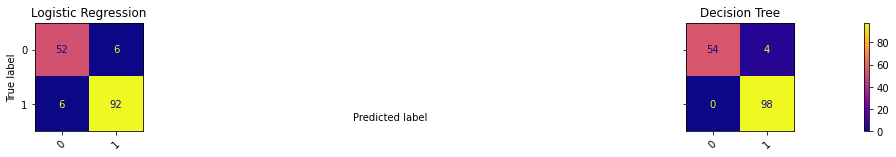

In [38]:
f, axes = plt.subplots(1, 2, figsize=(25, 2), sharey='row')
for i, (name, model) in enumerate(models.items()):
    y_pred = model.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45, cmap='plasma')
    disp.ax_.set_title(name)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
f.text(0.5, 0.2, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

In [39]:
# # #Converting pkl files conversion

In [40]:
import pickle
#Your Jupyter notebook code

import joblib
joblib.dump(dtr_model, "dtree.pkl")


['dtree.pkl']

In [41]:
# # Save the notebook as a .pkl file
with open("dtree.pkl", "wb") as f:
    pickle.dump(dtr_model, f)